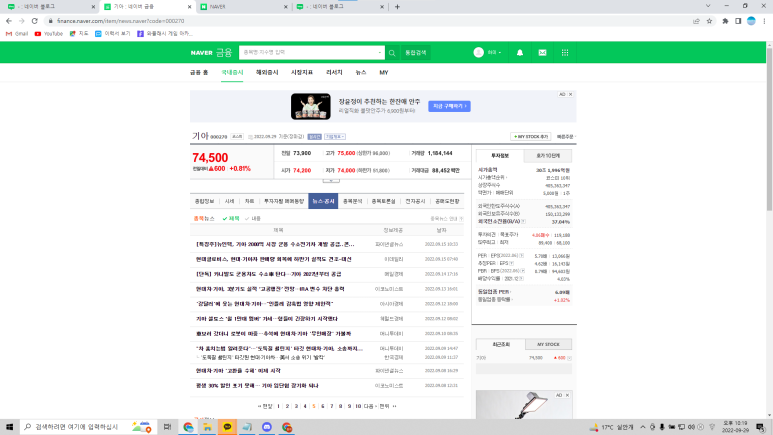

In [ ]:
!pip install -U finance-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import FinanceDataReader as fdr

In [ ]:
import time
from tqdm import trange

In [ ]:
def get_url(item_code, page_no):
    """
    item_code, page_no 를 넘기면 url 을 반환하는 함수
    """
    return f"https://finance.naver.com/item/news_news.nhn?code={item_code}&page={page_no}&sm=title_entity_id.basic&clusterId="

In [ ]:
def get_one_page_news(item_code, page_no):
    """
    get_url 에 item_code, page_no 를 넘겨 url 을 받아오고
    뉴스 한 페이지를 수집하는 함수
    1) URL 을 받아옴
    2) read_html 로 테이블 정보를 받아옴
    3) 데이터프레임 컬럼명을 ["제목", "정보제공", "날짜"]로 변경
    4) temp_list 에 데이터프레임을 추가
    5) concat 으로 리스트 병합하여 하나의 데이터프레임으로 만들기
    6) 결측치 제거
    7) 연관기사 제거
    8) 데이터프레임 반환
    """
    url = get_url(item_code,page_no)

    table = pd.read_html(url, encoding="cp949")

    df = table[0]
    cols = df.columns

    temp_list = []
    for news in table[:-1]:
        news.columns = cols
        temp_list.append(news)
    
    df_news = pd.concat(temp_list)

    df_news = df_news.dropna()

    df_news = df_news[~df_news["정보제공"].str.contains("연관기사")].copy().reset_index(drop=True)

    return df_news

In [ ]:
def get_naver_finance_news(item_name):

    df_krx = fdr.StockListing("KRX")
    item_code = df_krx.loc[df_krx["Name"] == item_name, "Symbol"].values[0]

    news_list = []

    for page_no in trange(1, 11):
        temp = get_one_page_news(item_code,page_no)
        news_list.append(temp)
        time.sleep(0.1)

    df_news = pd.concat(news_list).reset_index(drop=True) 
    return df_news

In [ ]:
get_naver_finance_news("기아")

100%|██████████| 10/10 [00:10<00:00,  1.01s/it]


,제목,정보제공,날짜
0,"기아 노사, 오늘 임단협 재교섭...내부서도 말 많은 '평생 신차 할인...",머니투데이,2022.09.29 16:33
1,‘제로백 3.5초’ 한국차 신기원…슈퍼카 넘은 ‘더 기아 EV6 GT’,헤럴드경제,2022.09.29 11:31
2,"“한국차 역사상 가장 빠른 차”… 기아, 내달 EV6 GT 출시",이코노미스트,2022.09.29 10:44
3,"""한국 역사상 가장 빨라""…포르쉐 이긴 '기아 신차' [영상]",한국경제,2022.09.29 09:57
4,"기아, EV6 고성능 모델 출시 임박…시속 100㎞까지 단 3.5초",서울경제,2022.09.29 09:32
...,...,...,...
241,"기아, 2년째 무분규 임단협 잠정합의…2일 찬반투표",파이낸셜뉴스,2022.08.30 19:21
242,기아 노사 2년 연속 무분규 잠정합의안 도출...현대차 인수 후 처음,머니투데이,2022.08.30 19:18
243,"기아 노사, 올해 임단협 잠정합의안 도출…2일 조합원 찬반 투표",이데일리,2022.08.30 19:17
244,"기아, 자동차 업종 내 최우선주…목표주가 11.7만원↑-다올",머니투데이,2022.08.29 07:55
